In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

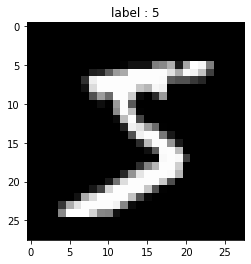

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

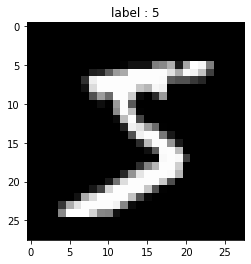

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

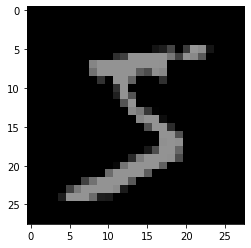

In [6]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

# 前処理

In [7]:
#０～１のfloat型に変換
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


# one-hot表現(y_train)

# train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


In [10]:
y_train = y_train[:, np.newaxis]
y_train.shape

(48000, 1)

# 雛型

In [11]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = True):
        self.verbose = verbose
        pass

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

# ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。  

今回はバッチサイズを20とします。今回使う訓練用データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練用データを一度全て見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。  

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [12]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [13]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0],
       [8],
       [6],
       [4],
       [0],
       [0],
       [1],
       [4],
       [2],
       [6],
       [8],
       [3],
       [1],
       [1],
       [0],
       [0],
       [4],
       [1],
       [4],
       [0]], dtype=uint8))


# 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [14]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, sigma=0.01, 
                 batch_size=20, n_output=10, verbose = True):
        
        self.verbose = verbose #ロスを出力するか否か
        self.n_features = n_features # 特徴量
        self.n_nodes1 = n_nodes1# 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.sigma = sigma # ガウス分布の標準偏差
        self.batch_size = batch_size # バッチサイズ
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        pass
    
    def _w_gain(self, n_features, n_nodes): # 重みの初期値を決めるメソッド

        self.W = self.sigma * np.random.randn(n_features, n_nodes) # 第一層の重み
        
        return self.W
        
    def _bias(self, n_nodes): # バイアス
        
        self.b = np.zeros(n_nodes)
        
        return self.b
    
    def _sigmoid(self, X): # 仮定関数sigmoidメソッドを定義する
        '''
        Parmeter
        ----------
        z : ndarray, shape ( n_samples, 1)
        
        Return
        ----------
        シグモイド関数
        '''
        #x_sig = np.dot(X, self.coef_.T) # n_sample * 1
        
        return 1 / (1 + np.exp(-X))
    
    def _tanh(self, X): # ハイパボリックタンジェント関数
        
        return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
    
    def _softmax(self, a): # ソフトマックス関数

        exp_a = np.exp(a)
        sum_exp_a = np.sum(exp_a)
        
        return exp_a / sum_exp_a

    
    def _forward(self, X): # フォーワードプロパゲーション
        w1, w2, w3 = self._w_gain(self.n_features, self.n_nodes1), self._w_gain(self.n_nodes1, self.n_nodes2),
        self._w_gain(self.n_nodes2, self.n_output)
        
        #b1, b2, b3 = 
        
        a1 = X@W1 + b1
        z1 = self.sigmoid(a1)
        a2 = z1@W2 + b2
        z2 = self.sigmoid(a2)
        a3 = z2@w3 + b3
        z3 = self.softmax(a3)
        
        return z3
    #def _target_function(self, y_):

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        

        

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

In [15]:
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）
sigma = 0.01

In [16]:
X = np.arange(20*784).reshape(20, 784)
X.shape

(20, 784)

In [17]:
def w_gain(n_features, n_nodes): # 重みの初期値を決めるメソッド
    W = sigma * np.random.randn(n_features, n_nodes) # 第一層の重み
        
    return W

In [18]:
w_gain(n_features,1).shape

(784, 1)

In [19]:
w1, w2, w3 = w_gain(n_features, n_nodes1), w_gain(n_nodes1, n_nodes2),w_gain(n_nodes2, n_output)
print(w1.shape, w2.shape, w3.shape)

(784, 400) (400, 200) (200, 10)


In [20]:
def sigmoid(X): # 仮定関数sigmoidメソッドを定義する
        
    return 1 / (1 + np.exp(-X))

In [21]:
X_train.shape

(48000, 784)

In [22]:
sigmoid(X_train).shape

(48000, 784)

In [23]:
def tanh(X): # ハイパボリックタンジェント関数
    (np.exp(X)-np.exp(-X)) / (np.exp(X) + np.exp(-X))
    
    return np.tanh(X)

In [24]:
def softmax(X): # ソフトマックス関数

    exp_a = np.exp(X)
    sum_exp_a = np.sum(exp_a, axis=1).reshape(-1, 1)
        
    return exp_a / sum_exp_a

In [25]:
w1 = w_gain(n_features, n_nodes1)
w2 = w_gain(n_nodes1, n_nodes2)
w3 = w_gain(n_nodes2, n_output)
b1 = w_gain(n_nodes1, 1).ravel()
b2 = w_gain(n_nodes2, 1).ravel()
b3 = w_gain(n_output, 1).ravel()

In [26]:
X_train.shape

(48000, 784)

In [27]:
def forward(X): # フォーワードプロパゲーション
#     w1 = w_gain(n_features, n_nodes1)
#     w2 = w_gain(n_nodes1, n_nodes2)
#     w3 = w_gain(n_nodes2, n_output)
#     b1 = w_gain(n_nodes1, 1).ravel()
#     b2 = w_gain(n_nodes2, 1).ravel()
#     b3 = w_gain(n_output, 1).ravel()
        
    a1 = X@w1 + b1
    z1 = sigmoid(a1)
    a2 = z1@w2 + b2
    z2 = sigmoid(a2)
    a3 = z2@w3 + b3
    z3 = softmax(a3)
        
    return a1, a2, a3, z1, z2, z3

In [28]:
X.shape

(20, 784)

In [29]:
d, e, f, g, h, i = forward(X)
i.shape

(20, 10)

In [30]:
hh = forward(X)
print(hh[:5])
g = np.argmax(h, axis=1)[:, np.newaxis]
print(g.shape)

(array([[ 2.44454071e+01,  5.55129691e+01, -3.12811838e+01, ...,
        -5.55562727e-01,  1.28075805e+02,  7.58464450e+01],
       [-2.48664400e+01,  1.30223501e+02, -8.91500562e+01, ...,
        -2.04906504e+02,  3.48308154e+02,  5.52961970e+02],
       [-7.41782871e+01,  2.04934032e+02, -1.47018928e+02, ...,
        -4.09257445e+02,  5.68540503e+02,  1.03007750e+03],
       ...,
       [-8.13855993e+02,  1.32559200e+03, -1.01505201e+03, ...,
        -3.47452156e+03,  3.87202573e+03,  8.18681037e+03],
       [-8.63167841e+02,  1.40030253e+03, -1.07292089e+03, ...,
        -3.67887250e+03,  4.09225808e+03,  8.66392590e+03],
       [-9.12479688e+02,  1.47501307e+03, -1.13078976e+03, ...,
        -3.88322344e+03,  4.31249043e+03,  9.14104142e+03]]), array([[ 0.04027225,  0.109744  ,  0.19830684, ..., -0.0678734 ,
         0.04474746, -0.0174863 ],
       [-0.01239363,  0.08546919,  0.14541208, ..., -0.04058331,
         0.08690396,  0.01341295],
       [ 0.02390633,  0.07053769,  0.1685

In [31]:
a1 = X@w1 + b1
z1 = sigmoid(a1)
a2 = z1@w2 + b2
z2 = sigmoid(a2)
a3 = z2@w3 + b3
z3 = softmax(a3)

In [32]:
c = forward(X)
np.log(c).shape

ValueError: could not broadcast input array from shape (20,400) into shape (20)

In [42]:
z3.shape

(20, 10)

In [43]:
y.shape

NameError: name 'y' is not defined

In [44]:
y = np.random.randint(0, 2, (c.shape[0], )).reshape(-1, 1)
print(y.shape)

(200, 1)


In [34]:
term_1 = batch_size
term_2 = np.log(c)
y = np.random.randint(0, 2, (c.shape[0], )).reshape(-1, 1)
        
l = -(1/term_1) * np.sum(y * term_2)

print(l)

ValueError: could not broadcast input array from shape (20,400) into shape (20)

In [35]:
d = np.random.randint(0, 2,(5, 2))
e = np.arange(10).reshape(5, 2)

print(d)
print(e)
print(d*e)

[[1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[0 1]
 [2 0]
 [0 5]
 [0 7]
 [0 9]]


In [36]:
a = forward(X)- y
np.sum(a, axis=0)[np.newaxis, :].shape

NameError: name 'y' is not defined

In [37]:
c = np.sum(z2.T, axis=1).reshape(-1, 1)

In [38]:
(tanh(X)**2).shape

C:\Users\ykenk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(20, 784)

In [39]:
np.sum(a2, axis=0).shape

(200,)

In [40]:
w2.shape

(400, 200)

In [41]:
n = batch_size
lr = 0.001

L_A3 = (z3 - y)
print("L_A3",L_A3.shape)
L_B3 = np.sum(L_A3, axis=0)
print("L_B3",L_B3.shape)
L_W3 = (z2.T)@L_A3
print("L_W3",L_W3.shape)
L_Z2 = L_A3@w3.T
print("L_Z2", L_Z2.shape)

w3 = w3 - lr*L_W3
print("w3", w3.shape)
b3 = b3 - lr*L_B3
print("b3", b3.shape)

L_A2 = L_Z2*(1- (tanh(a2)**2))
print("L_A2", L_A2.shape)
L_B2 = np.sum(L_A2, axis=0)
print("L_B2",L_B2.shape)
L_W2 = (z1.T)@L_A2
print("L_W2",L_W2.shape)
L_Z1 = L_A2@w2.T
print("L_Z1", L_Z1.shape)

w2 = w2 - lr*L_W2
print("w2", w2.shape)
b2 = b2 - lr*L_B2
print("b2", b2.shape)

L_A1 = L_Z1 * (1- (tanh(a1))**2)
print("L_A1", L_A1.shape)
L_B1 = np.sum(L_A1, axis=0)
print("L_B1",L_B1.shape)
L_W1 = (X.T)@L_A1
print("L_W1", L_W1.shape)

w1 = w1 - lr*L_W1
print("w1", w1.shape)
b1 = b1 - lr*L_B1
print("b1", b1.shape)


NameError: name 'y' is not defined

In [ ]:
def _backpropagation(self, X, y):
    '''
    X : ndarray, shape(batch_size, n_features)
        特徴量ベクトル
    y : ndarray, shape(batch_size, n_output)
    '''
    n = self.batch_size
    #lr = 0.01
    L_A3 = (self.z3 - y)
        
    L_B3 = np.sum(L_A3)
    L_W3 = (self.z2.T)@L_A3
    L_Z2 = L_A3@self.w3.T
    self.w3 = self.w3 - self.lr*L_W3
    self.b3 = self.b3 - self.lr*L_B3

    L_A2 = L_Z2*(1- (self.tanh(self.a2)**2))
    L_B2 = np.sum(L_A2)
    L_W2 = (self.z1.T)@L_A2
    L_Z1 = L_A2@self.w2.T

    self.w2 = self.w2 - self.lr*L_W2
    self.b2 = self.b2 - self.lr*L_B2

    L_A1 = L_Z1 * (1- (self.tanh(self.a1))**2)
    L_B1 = np.sum(L_A1)
    L_W1 = (X.T)@L_A1

    self.w1 = self.w1 - self.lr*L_W1
    self.b1 = self.b1 - self.lr*L_B1

In [ ]:
def loss_function(X, y):
    '''
    y : ndarray, size(batch_size, n_output)
        正解ラベル
    n_output : スカラー
        クラス数
    '''
    term_1 = batch_size
    term_2 = np.log(z3)
        
    L = -(1/term_1) * np.sum(y * term_2)
        
    return L

In [ ]:
loss_function(X_train, y_train)

In [ ]:
def w_gain(n_feature, n_node): # 重みの初期値を決めるメソッド

    W = sigma * np.random.randn(n_feature, n_node) # 第一層の重み
        
    return W

In [ ]:
n_features = 784
n_nodes1 = 400
w_gain(n_nodes1, 1).ravel().shape

In [ ]:
    def _forward(self, X):
        
        f = self.tanh
        
        self.a1 = X@self.w1 + self.b1
        self.z1 = f(self.a1)
        self.a2 = self.z1@self.w2 + self.b2
        self.z2 = f(self.a2)
        self.a3 = self.z2@self.w3 + self.b3
        self.z3 = self.softmax(self.a3)